Корреляция

In [14]:
import numpy as np


# Положительная корреляция
x1 = np.array([1, 2, 3, 4, 5])
np.correlate(x1, x1, mode='valid')
np.sum(x1*x1)

# Отрицательная корреляция
x2 = -1 * np.array([1, 2, 3, 4, 5])
np.correlate(x1, x2, mode='valid')

# При разных сигналах
x1, x2 = np.ones(5), np.arange(5)
np.correlate(x1, x2, mode='valid')
np.sum(x1*x2)

np.float64(10.0)

Корреляция случайных сигналов (нулевая корреляция)

No correlation, r12 = [-45].


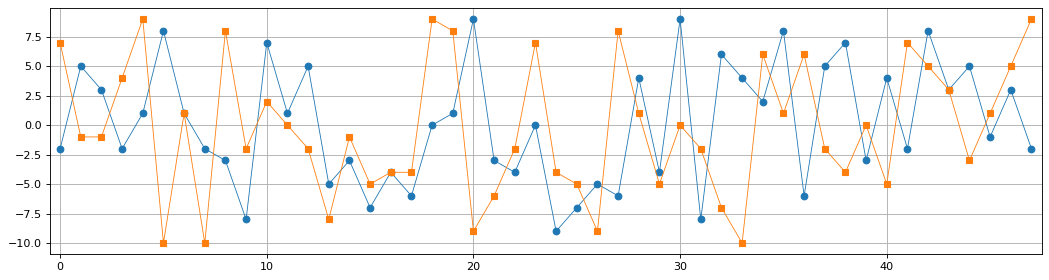

In [15]:
import numpy as np
import matplotlib.pyplot as plt



N = 48
np.random.seed(2)
x1, x2 = np.random.randint(-10, 10, N), np.random.randint(-10, 10, N)
r12 = np.correlate(x1, x2, mode='valid')

plt.figure(figsize=(16, 4), dpi=80)
plt.plot(x1, '-o', linewidth=0.75, markersize=6)
plt.plot(x2, '-s', linewidth=0.75, markersize=6)
plt.xlim([-0.5, N-0.5])
plt.grid(True)

print(f'No correlation, r12 = {r12}.')

Корреляции дельта-функции со случайным сигналом

Correlation, r12 = [-69].


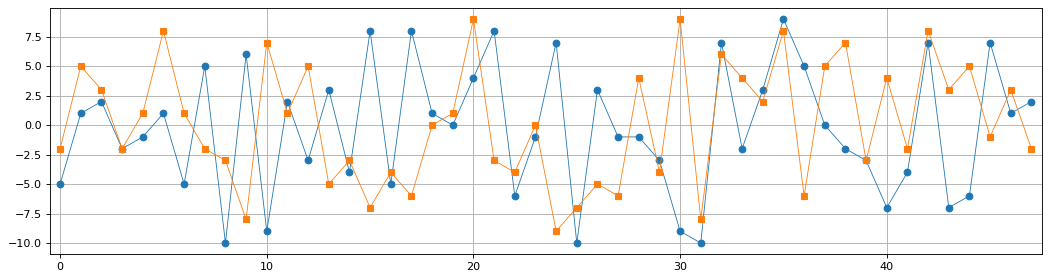

In [16]:
import numpy as np
import matplotlib.pyplot as plt


N = 48
np.random.seed(1)
x1 = np.random.randint(-10, 10, N)

np.random.seed(2)
x2 = np.random.randint(-10, 10, N)

r12 = np.correlate(x1, x2, mode='valid')

plt.figure(figsize=(16, 4), dpi=80)
plt.plot(x1, '-o', linewidth=0.75, markersize=6)
plt.plot(x2, '-s', linewidth=0.75, markersize=6)
plt.xlim([-0.5, N-0.5])
plt.grid(True)

print(f'Correlation, r12 = {r12}.')

АКФ

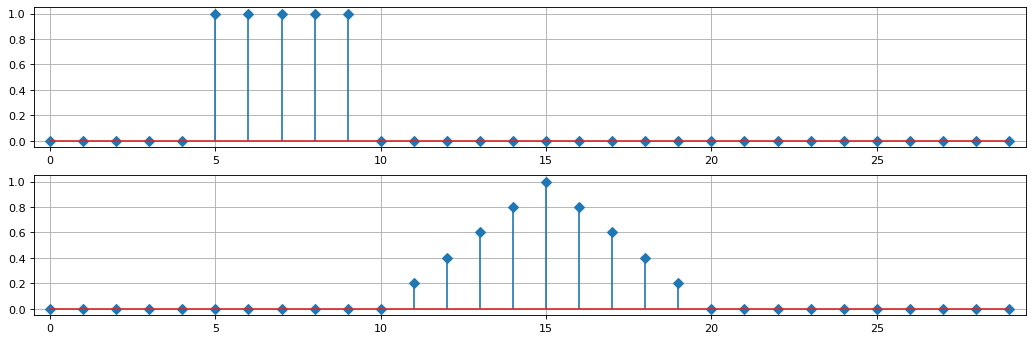

In [17]:
import numpy as np
import matplotlib.pyplot as plt


def auto_corr(x):
    res = np.correlate(x, x, mode='same')
    return res / np.max(res)        # нормализация корреляции


x = np.concatenate([np.zeros(5), np.ones(5), np.zeros(20)])         # прямоугольный импульс

cfx = auto_corr(x)

xl = [x, cfx]

plt.figure(figsize=(16, 5), dpi=80)

for i in range(2):
    plt.subplot(2, 1, i+1)
    plt.stem(xl[i], linefmt='C0', markerfmt='D')
    plt.grid(True)
    plt.xlim([-0.5, x.size-0.5])

plt.show()

Линейная свертка

In [18]:
import numpy as np


N, M = 4, 3
a, b = [1, 2, 3, 4], [3, 2, 1]

# Подстановка сигналов для пошагового метода
an = np.concatenate([np.zeros(M-1, dtype=int), a])
bn = np.concatenate([b[::-1], np.zeros(N-1, dtype=int)])  

# Пошаговое вычисление свертки с использованием сдвига и суммы произведений
ab = np.array([np.sum(an * np.roll(bn, i)) for i in range(N+M-1)])

# Вычисление свертки с numpy
cv = np.convolve(a, b, mode='full')

Свёртка прямоугольного импульса с самим собой

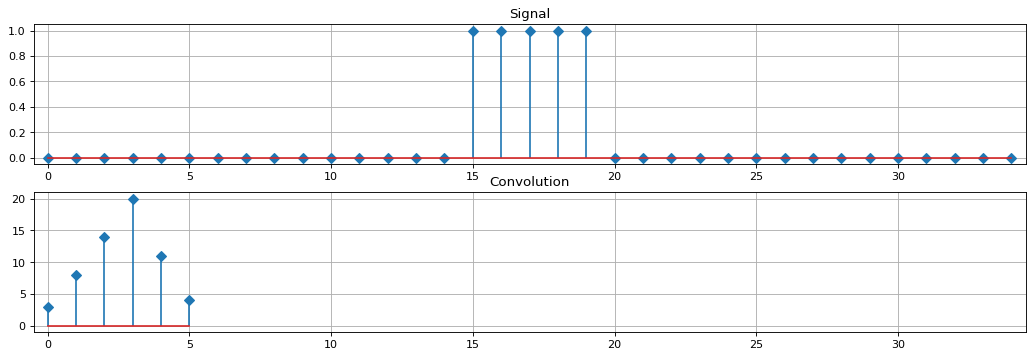

In [19]:
import numpy as np
import matplotlib.pyplot as plt


FONT_SMALL = 12
FONT_MEDIUM = 14

N, M = 4, 3
a, b = [1, 2, 3, 4], [3, 2, 1]

x = np.concatenate([np.zeros(15), np.ones(5), np.zeros(15)])

cv = np.convolve(a, b, mode='full')
xl = [x, cv]

plt.figure(figsize=(16, 5), dpi=80)
titles = ['Signal', 'Convolution']

for i in range(2):
    plt.subplot(2, 1, i+1)
    plt.title(titles[i])
    plt.stem(xl[i], linefmt='C0', markerfmt='D')
    plt.grid(True)
    plt.xlim([-0.5, x.size-0.5])

plt.show()

Циклическая свертка

In [20]:
import numpy as np

an = np.array([1, 2, 3, 4], dtype=int)
bn = np.array([3, 2, 1, 0], dtype=int)

ab = np.array([np.sum(an * np.roll(bn[::-1], i+1)) for i in range(N)])

Пример циклической свертки через БПФ

In [21]:
import numpy as np
from scipy.fftpack import fft, ifft 


def circle_conv(an, bn):
    return np.real(ifft(fft(an) * fft(bn)))

N = 4

an = np.array([1, 2, 3, 4], dtype=int)
bn = np.array([3, 2, 1, 0], dtype=int)

cv = circle_conv(an, bn)

Пример фильтрации

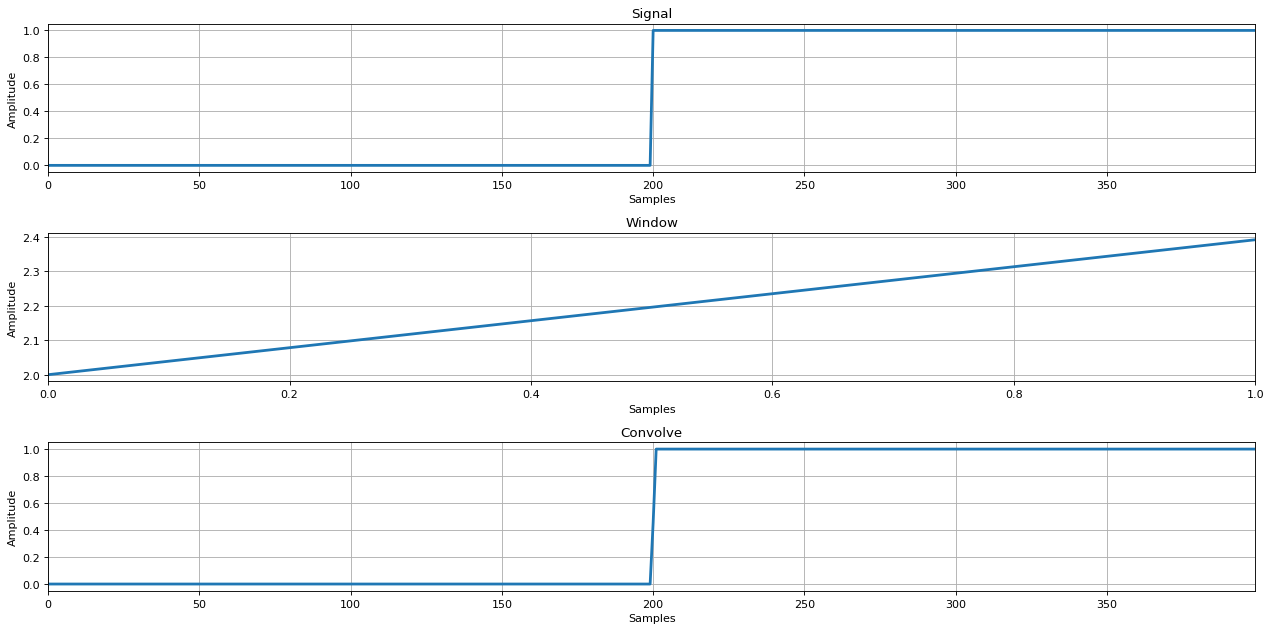

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft 
from scipy import signal

sig = np.repeat([0., 1.,], 200)
win = signal.kaiserord(32, 11)
fil = signal.convolve(sig, win, mode='same') / np.sum(win)

f_list = [sig, win, fil]
t_list = ['Signal', 'Window', 'Convolve']

plt.figure(figsize=(16, 8), dpi=80)
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(f_list[i], '-', linewidth=2.5)
    plt.title(t_list[i])
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.xlim([0, len(f_list[i])-1])
    plt.grid()
    
plt.tight_layout()
plt.show()